In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [174]:
data = pd.read_csv('Titanic-Dataset.csv')

In [175]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
data.shape

(891, 12)

In [177]:
print('No. of rows:', data.shape[0])
print('No. of Columns:',data.shape[1])

No. of rows: 891
No. of Columns: 12


In [178]:
# Type of variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
## check 5 point summary
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
## drop the PassengerId
data.drop(columns='PassengerId',inplace=True)

### Find the missing values 

In [181]:
# calculate the missing value
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [182]:
(data.isnull().sum()/len(data))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

##### 'Age' ,'Cabin','Embarked' has contain the missing values

In [183]:
# Impute missing values for Cabin with a new category 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

In [184]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [185]:
## Treat the cabin 
# here we are bin the cabins

cabins = data.Cabin.unique()[1:]

def cab(x):
    if x in cabins:
        return ('Cabin_Alloted')
    else:
        return ('Missing')

In [186]:
data['Cabin_cat'] = data.Cabin.apply(cab)

In [187]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Missing
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_Alloted
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Missing
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin_Alloted
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Missing


<Axes: xlabel='Cabin_cat'>

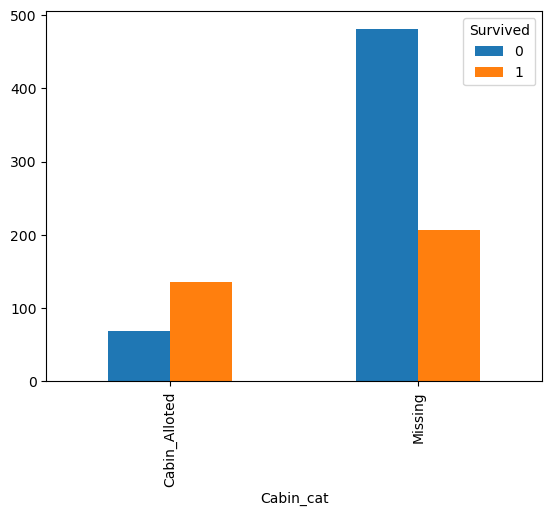

In [188]:
# Cabin vs Survived
tbl = pd.crosstab(data.Cabin_cat,data.Survived)
tbl.plot(kind = 'bar')

In [189]:
# Parch and SibSp
data['Family'] = data.SibSp+data.Parch+1

In [190]:
data.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [191]:
# 1 Singles, 2 couple, 3 small family, >3 : large family

def fam(x):
    if x==1:
        return('Solo')
    elif x==2:
        return('Couple')
    elif x==3:
        return('Small_Family')
    else:
        return('Large_Family')

In [192]:
data['Family_Cat'] = data.Family.apply(fam)

In [193]:
data.Family_Cat.unique()

array(['Couple', 'Solo', 'Large_Family', 'Small_Family'], dtype=object)

In [194]:
data.Family_Cat.value_counts()

Solo            537
Couple          161
Small_Family    102
Large_Family     91
Name: Family_Cat, dtype: int64

<Axes: xlabel='Family_Cat'>

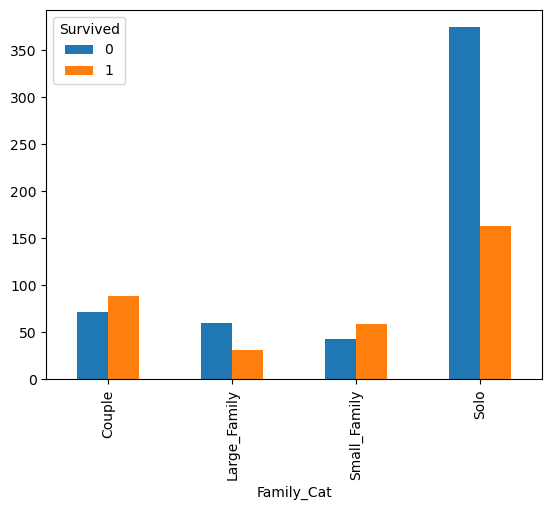

In [195]:
tbl = pd.crosstab(data.Family_Cat,data.Survived)
tbl.plot(kind = 'bar')

In [196]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [197]:
titles = []
for i in data.Name:
    titles.append(i.split(",")[1].split('. ')[0].strip())

In [198]:
data['titles'] = pd.Series(titles)

In [199]:
data.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [200]:
ignore = [ 'Don', 'Rev', 'Dr', 'Mme', 
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

def nahi_chahiye(x):
    if x in ignore:
        return('Others')
    else:
        return(x)

In [201]:
data['titles'] = data.titles.apply(nahi_chahiye)

In [202]:
data.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.0,63.0
Mr,398.0,32.368090,12.708793,11.00,23.000,30.0,39.0,80.0
Mrs,108.0,35.898148,11.433628,14.00,27.750,35.0,44.0,63.0
Ms,1.0,28.000000,NaN,28.00,28.000,28.0,28.0,28.0
Others,25.0,42.960000,13.135448,23.00,32.000,45.0,52.0,70.0


In [203]:
data.loc[data.Age.isnull(),'titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

#### Treat the missing values

In [204]:
# impute the missing values
data.loc[(data.Age.isnull()) & (data.titles=='Master'),'Age'] = 4
data.loc[(data.Age.isnull()) & (data.titles=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.titles=='Mr'),'Age'] = 29
data.loc[(data.Age.isnull()) & (data.titles=='Mrs'),'Age'] = 35.5
data.loc[(data.Age.isnull()) & (data.titles=='Ms'),'Age'] = 28
data.loc[(data.Age.isnull()) & (data.titles=='Others'),'Age'] = 45

In [205]:
# Embarked
data.loc[data.Embarked.isnull(),'Embarked'] = data.Embarked.mode()[0]

In [206]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
Cabin_cat     0
Family        0
Family_Cat    0
titles        0
dtype: int64

In [207]:
# Drop the unnecessary columns
data.drop(['Parch','SibSp','Name','Cabin','Ticket'],axis=1,inplace=True)

In [208]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,Family,Family_Cat,titles
0,0,3,male,22.0,7.2500,S,Missing,2,Couple,Mr
1,1,1,female,38.0,71.2833,C,Cabin_Alloted,2,Couple,Mrs
2,1,3,female,26.0,7.9250,S,Missing,1,Solo,Miss
3,1,1,female,35.0,53.1000,S,Cabin_Alloted,2,Couple,Mrs
4,0,3,male,35.0,8.0500,S,Missing,1,Solo,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Missing,1,Solo,Others
887,1,1,female,19.0,30.0000,S,Cabin_Alloted,1,Solo,Miss
888,0,3,female,22.0,23.4500,S,Missing,4,Large_Family,Miss
889,1,1,male,26.0,30.0000,C,Cabin_Alloted,1,Solo,Mr


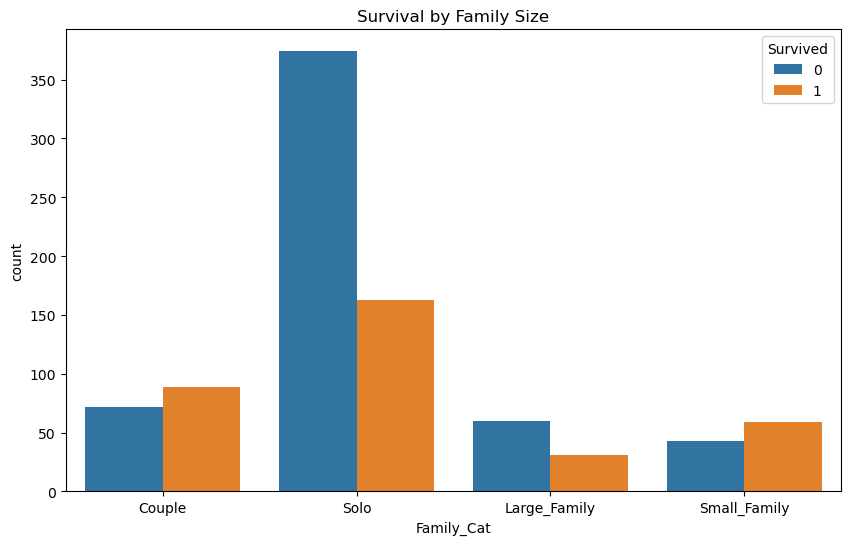

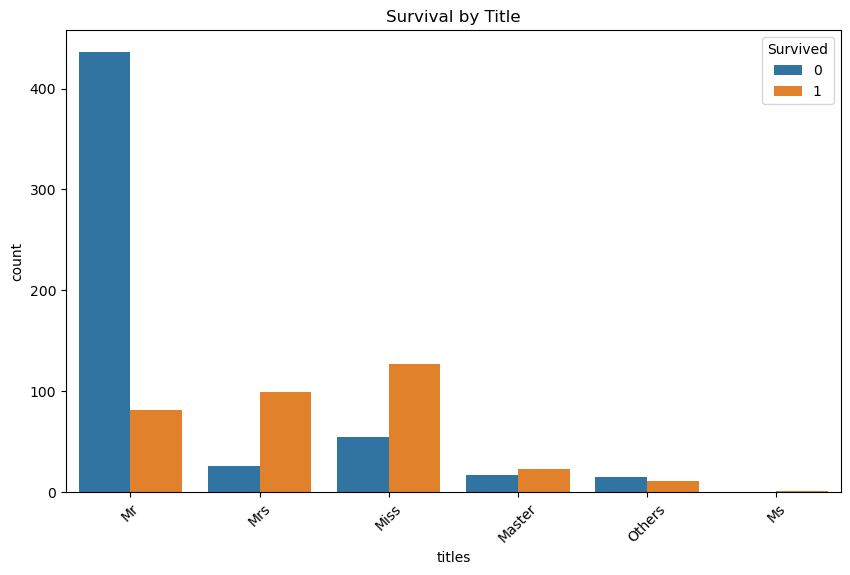

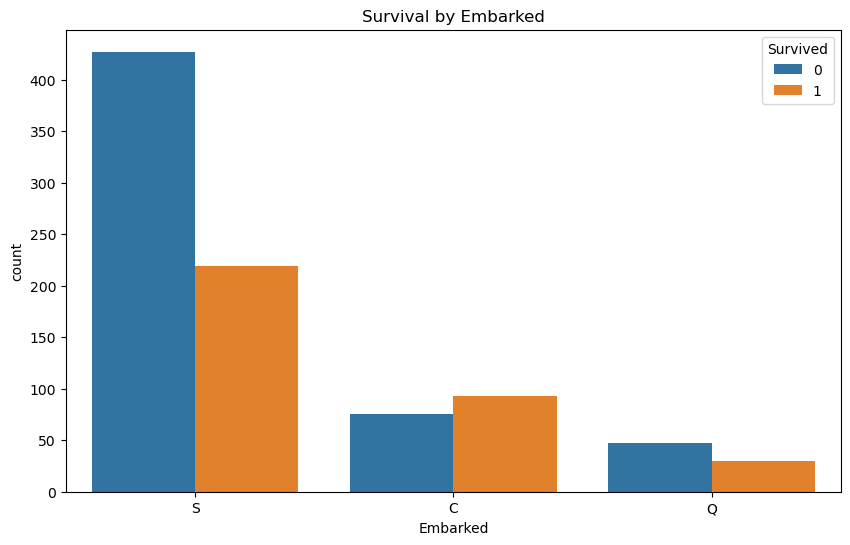

In [209]:
# Visualize the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Cat', hue='Survived', data=data)
plt.title('Survival by Family Size')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='titles', hue='Survived', data=data)
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarked')
plt.show()



### Feature Encoding

In [210]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,Family,Family_Cat,titles
0,0,3,male,22.0,7.2500,S,Missing,2,Couple,Mr
1,1,1,female,38.0,71.2833,C,Cabin_Alloted,2,Couple,Mrs
2,1,3,female,26.0,7.9250,S,Missing,1,Solo,Miss
3,1,1,female,35.0,53.1000,S,Cabin_Alloted,2,Couple,Mrs
4,0,3,male,35.0,8.0500,S,Missing,1,Solo,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Missing,1,Solo,Others
887,1,1,female,19.0,30.0000,S,Cabin_Alloted,1,Solo,Miss
888,0,3,female,22.0,23.4500,S,Missing,4,Large_Family,Miss
889,1,1,male,26.0,30.0000,C,Cabin_Alloted,1,Solo,Mr


In [211]:
# Select categorical columns
categorical_cols = ['Sex','Embarked','Cabin_cat','Family_Cat','titles']

# One-hot encode categorical features
new_data = pd.get_dummies(data, columns=categorical_cols,drop_first=True)


In [212]:
new_data

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_cat_Missing,Family_Cat_Large_Family,Family_Cat_Small_Family,Family_Cat_Solo,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Others
0,0,3,22.0,7.2500,2,1,0,1,1,0,0,0,0,1,0,0,0
1,1,1,38.0,71.2833,2,0,0,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,1,0,0,1,1,0,0,0,0
3,1,1,35.0,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,0
4,0,3,35.0,8.0500,1,1,0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0,1,1,0,0,1,0,0,0,0,1
887,1,1,19.0,30.0000,1,0,0,1,0,0,0,1,1,0,0,0,0
888,0,3,22.0,23.4500,4,0,0,1,1,1,0,0,1,0,0,0,0
889,1,1,26.0,30.0000,1,1,0,0,0,0,0,1,0,1,0,0,0


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score,roc_curve,recall_score,precision_score,f1_score


In [229]:
# Split the data into features (X) and target variable (y)
X = new_data.drop(columns=['Survived'])
y = new_data['Survived']

In [230]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [236]:
models  = []
accuracy =[]
precision =[]
recall =[]
f1 =[]


In [239]:
def model_validation(model,X_train,y_train,X_test,y_test):
    
    m = model
    m.fit(X_train,y_train)
    pred = m.predict(X_test)
    prob = m.predict_proba(X_test)[:,1]
    
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('ROC AUC:',roc_auc_score(y_test,prob))
    fpr ,tpr,_ =roc_curve(y_test,pred)
    plt.plot(fpr,tpr,color = 'green')
    plt.plot([0,1],[0,1],color = 'red')
    plt.show()
    
    resp = input('Do you want to save this model in summary? Y/N')
    if resp.lower()=='y':
        models.append(str(m))
        accuracy.append(accuracy_score(y_test,pred))
        recall.append(recall_score(y_test,pred))
        precision.append(precision_score(y_test,pred))
        f1.append(f1_score(y_test,pred))
        
        global models_df
        models_df = pd.DataFrame({'Model':models,
                                 'Accuracy':accuracy,
                                 'Recall':recall,
                                 'Precision':precision,
                                 'F1':f1})
                                 
    else:
        return

Confusion matrix:
 [[143  18]
 [ 32  75]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       161
           1       0.81      0.70      0.75       107

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

ROC AUC: 0.8522087420909038


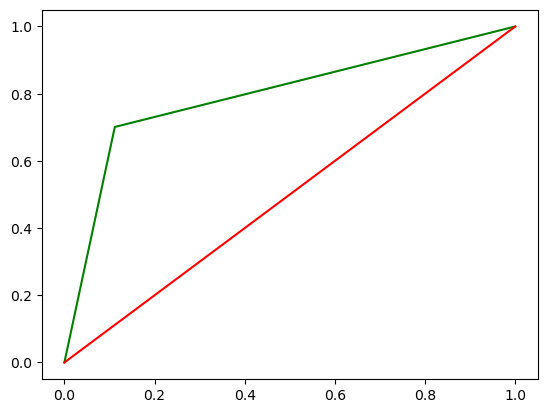

Do you want to save this model in summary? Y/Ny


In [240]:
model_validation(LogisticRegression(),X_train,y_train,X_test,y_test)

Confusion matrix:
 [[138  23]
 [ 35  72]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       161
           1       0.76      0.67      0.71       107

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

ROC AUC: 0.8484936436988447


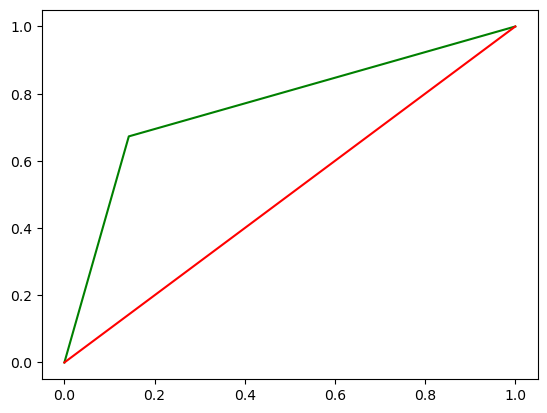

Do you want to save this model in summary? Y/Ny


In [241]:
model_validation(RandomForestClassifier(),X_train,y_train,X_test,y_test)

Confusion matrix:
 [[134  27]
 [ 30  77]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       161
           1       0.74      0.72      0.73       107

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

ROC AUC: 0.8319788703778952


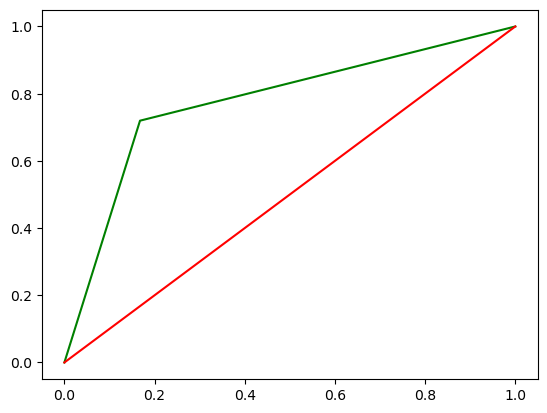

Do you want to save this model in summary? Y/Ny


In [242]:
model_validation(AdaBoostClassifier(),X_train,y_train,X_test,y_test)

Confusion matrix:
 [[137  24]
 [ 34  73]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       161
           1       0.75      0.68      0.72       107

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

ROC AUC: 0.8288152319034074


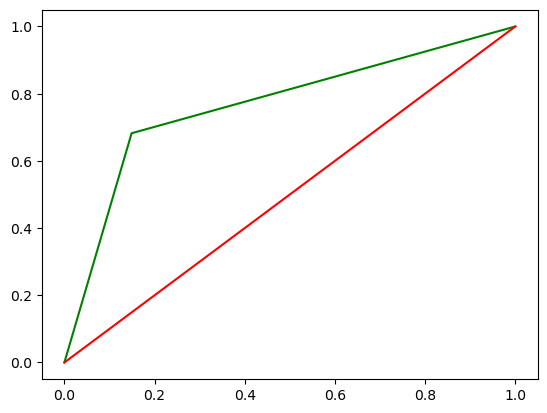

Do you want to save this model in summary? Y/Ny


In [243]:
model_validation(XGBClassifier(),X_train,y_train,X_test,y_test)

Confusion matrix:
 [[143  18]
 [ 33  74]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       161
           1       0.80      0.69      0.74       107

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

ROC AUC: 0.8671852324838916


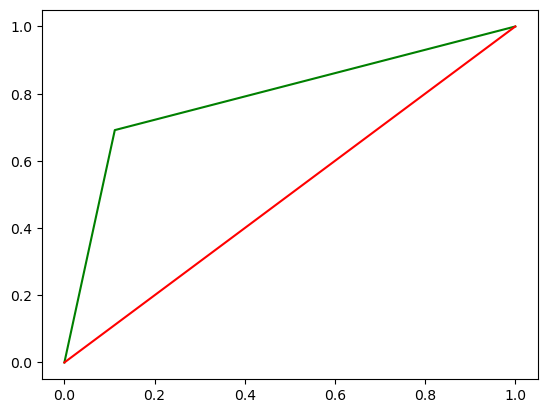

Do you want to save this model in summary? Y/Ny


In [244]:
model_validation(GradientBoostingClassifier(),X_train,y_train,X_test,y_test)

In [245]:
models_df

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(),0.813433,0.700935,0.806452,0.750000
1,LogisticRegression(),0.813433,0.700935,0.806452,0.750000
2,RandomForestClassifier(),0.783582,0.672897,0.757895,0.712871
3,AdaBoostClassifier(),0.787313,0.719626,0.740385,0.729858
4,"XGBClassifier(base_score=None, booster=None, c...",0.783582,0.682243,0.752577,0.715686
5,GradientBoostingClassifier(),0.809701,0.691589,0.804348,0.743719


In [ ]:
# Logistic Regression doing well to predict the survived class with accuracy = 81 % and F1 score = 75